In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import datasets

## MLP WITH MNIST

In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.mnist.load_data()

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
mlp = Sequential()
mlp.add(Flatten(input_shape=(28,28)))
mlp.add(Dense(128,activation='relu'))
mlp.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
mlp.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history1 = mlp.fit(X_train,y_train,batch_size=128,epochs=8,validation_split=0.2)

Epoch 1/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8107 - loss: 0.6892 - val_accuracy: 0.9417 - val_loss: 0.2128
Epoch 2/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9453 - loss: 0.2000 - val_accuracy: 0.9582 - val_loss: 0.1516
Epoch 3/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9600 - loss: 0.1416 - val_accuracy: 0.9627 - val_loss: 0.1308
Epoch 4/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9692 - loss: 0.1090 - val_accuracy: 0.9663 - val_loss: 0.1151
Epoch 5/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9747 - loss: 0.0878 - val_accuracy: 0.9684 - val_loss: 0.1063
Epoch 6/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9813 - loss: 0.0686 - val_accuracy: 0.9684 - val_loss: 0.0992
Epoch 7/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9845 - loss: 0.0583 - val_accuracy: 0.9719 - val_loss: 0.0933
Epoch 8/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9875 - loss: 0.0486 - val_accuracy: 0.9736 - v

In [ ]:
mlp.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9729 - loss: 0.0898


[0.07966957986354828, 0.9757000207901001]

In [ ]:
predictions = mlp.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


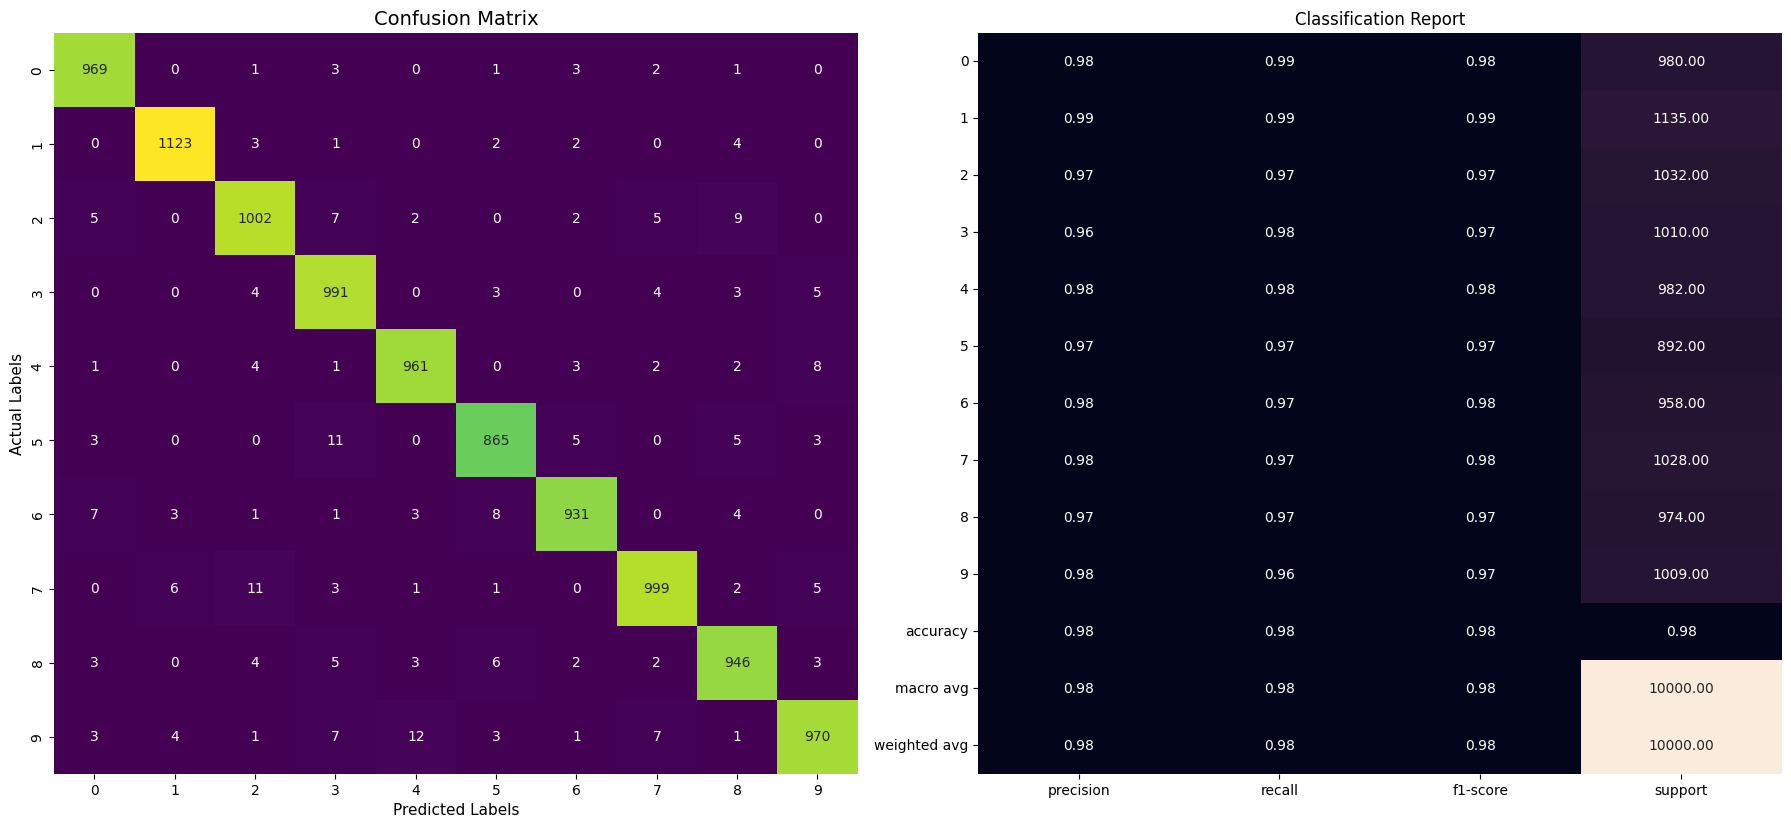

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

#sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.0f')

def predict_metrics(model,X,y):
  preds = model.predict(X).argmax(axis=1)
  c_report = pd.DataFrame(classification_report(y,preds,output_dict=True)).T

  cm = confusion_matrix(y,preds)

  fig,ax = plt.subplots(1,2,figsize=(18,8))
  fig.tight_layout()

  ax[0] = sns.heatmap(confusion_matrix(y,preds),annot=True,fmt='.0f',cmap='viridis',cbar=False,ax=ax[0])
  ax[0].set_xlabel("Predicted Labels",fontsize=11)
  ax[0].set_ylabel("Actual Labels",fontsize=11)
  ax[0].set_title("Confusion Matrix",fontsize=14)

  ax[0].xaxis.set_ticklabels([x for x in range(10)])
  ax[0].yaxis.set_ticklabels([x for x in range(10)])


  ax[1] = sns.heatmap(c_report,annot=True,fmt='0.2f',cbar=False)
  ax[1].set_title("Classification Report")

  plt.subplots_adjust(wspace=0.15)

  plt.show()
predict_metrics(mlp,X_test,y_test)

## CNN FOR CIFAR100

In [ ]:
(X_train1,y_train1),(X_test1,y_test1) = datasets.cifar100.load_data()

In [ ]:
X_train1 = X_train1.astype('float32')/255.0
X_test1 = X_test1.astype('float32')/255.0